<pre>
1. EDA
 - 데이터셋 확인
 - 레이블 분포 확인
 - **결측확인
 - **데이터 수치형 변환
 
2. 분석 데이터 준비(결측,수치)
 - 상관분석(분석에 사용할 피쳐 고르는 과정)
 - 1차 모델선정/평가
3. 전처리/가공
 - 정규화/표준화 (스케일링-->
 - 상관분석 주요 피쳐 대상 이상치 제거
 - 인코딩
 - PCA (차원축소)
 - 범주화/구간화
4. 모델 재평가 / 검증 / 튜닝
  - 오버샘플링/언더샘플링
  - 검증/튜닝
  - threshold 조정
</pre>    


In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



#전처리 : outlier, scale(정규/표준), encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, Binarizer #pd.get_dummpy()

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import Xg.. li...
# from sklearn.metrics import mean_squared_error ... mse rmse mas rmsle
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, fbeta_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

warnings.filterwarnings("ignore")
%matplotlib inline


In [5]:
df = pd.read_csv('./creditcard.csv')
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [231]:
#### 레이블 분포 확인
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
def myscore(y_test, pred, proba=None):
    accuracy = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    confusion = confusion_matrix(y_test, pred)
    auc = roc_auc_score(y_test, proba[:,1].reshape(-1,1))
    print("정확도:{:.4f},재현율:{:.4f},정밀도:{:.4f},f1:{:.4f},auc:{:.4f}".format(accuracy,recall,precision,f1,auc))
    print("confusion:", confusion)

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape, y.shape)

(284807, 30) (284807,)


In [234]:
### 카테고리성 피쳐 확인
oh_numeric_feature = []
for col in df.columns:
    if df[col].nunique() <= 15:
        print(col, df[col].unique())
        oh_numeric_feature.append(col)
print("카테고리성 피쳐 확인 :",df.shape)

Class [0 1]
카테고리성 피쳐 확인 : (284807, 31)


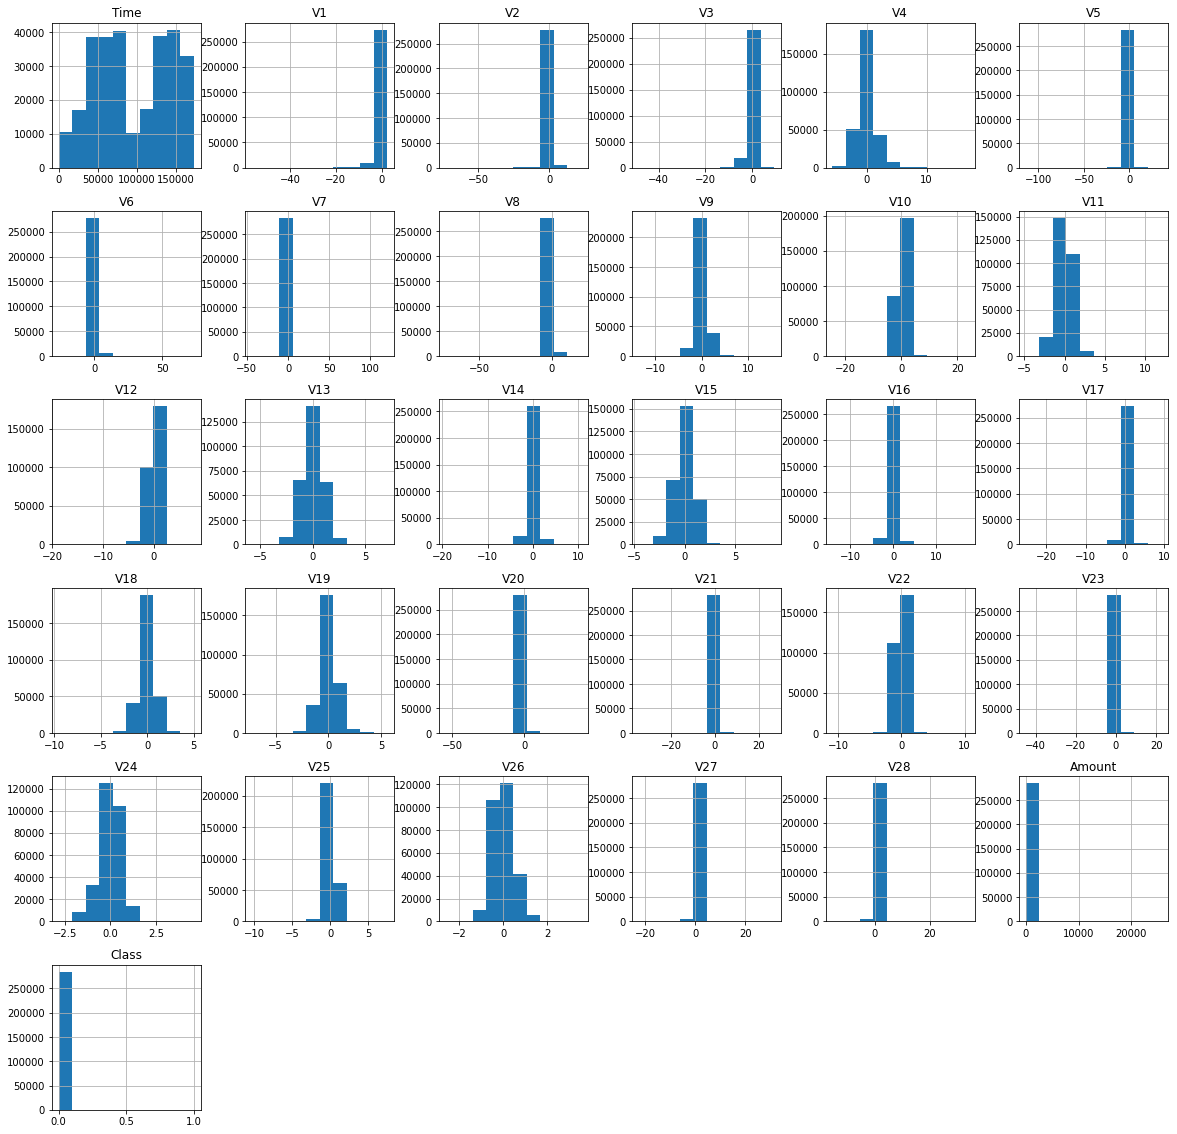

In [10]:
df.hist(figsize=(20,20))
plt.show()

In [10]:
#============= 전처리 : oulier 일환 = 0값 찾기
features = df.columns
for feature in features:
    zero_cnt = df[df[feature]==0][feature].count()
    print(feature, zero_cnt, zero_cnt/df.shape[0]*100)


Time 2 0.0007022299311463553
V1 0 0.0
V2 0 0.0
V3 0 0.0
V4 0 0.0
V5 0 0.0
V6 0 0.0
V7 0 0.0
V8 0 0.0
V9 0 0.0
V10 0 0.0
V11 0 0.0
V12 0 0.0
V13 0 0.0
V14 0 0.0
V15 0 0.0
V16 0 0.0
V17 0 0.0
V18 0 0.0
V19 0 0.0
V20 0 0.0
V21 0 0.0
V22 0 0.0
V23 0 0.0
V24 0 0.0
V25 0 0.0
V26 0 0.0
V27 0 0.0
V28 0 0.0
Amount 1825 0.6407848121710491
Class 284315 99.82725143693798


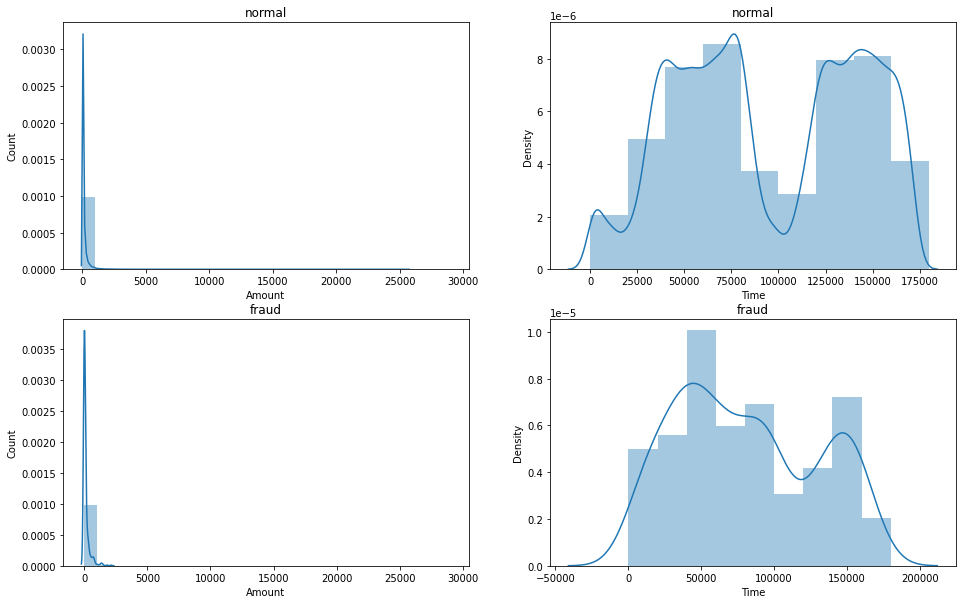

In [235]:
ndf  = df[df['Class']==0]
fdf  = df[df['Class']==1]
# ndf_fdf = pd.concat([ndf, fdf])

fig, axes = plt.subplots(figsize=(16,10), ncols=2, nrows=2)
# plt.xticks(range(0, 30000, 1000), rotation=60)

bins = np.arange(0, 30000, 1000)
sns.distplot(ndf['Amount'] , ax=axes[0][0], bins=bins)
axes[0][0].set(ylabel='Count',title="normal")

bins = np.arange(0, 200000, 20000)
sns.distplot(ndf['Time'] , ax=axes[0][1], bins=bins)
axes[0][1].set(ylabel='Density',title="normal")

bins = np.arange(0, 30000, 1000)
sns.distplot(fdf['Amount'] , ax=axes[1][0], bins=bins)
axes[1][0].set(ylabel='Count',title="fraud")

bins = np.arange(0, 200000, 20000)
sns.distplot(fdf['Time'] , ax=axes[1][1], bins=bins)
axes[1][1].set(ylabel='Density',title="fraud")

plt.show()

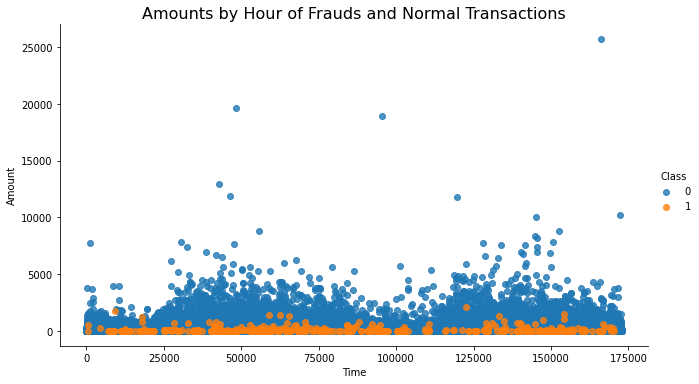

In [113]:
ax = sns.lmplot(y="Amount", x="Time", fit_reg=False, aspect=1.8, data=df, hue='Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize=16)
plt.show()

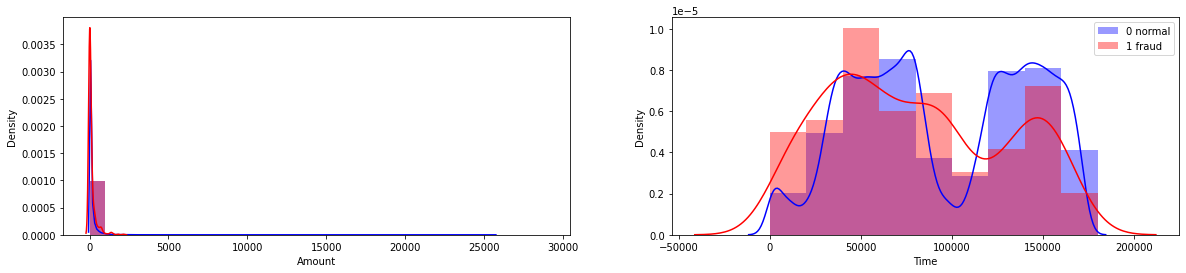

In [236]:
fig, axes = plt.subplots(figsize=(20, 4), ncols=2)
# plt.xticks(range(0, 30000, 1000), rotation=60)

bins = np.arange(0, 30000, 1000)
sns.distplot(df[df['Class']==0]['Amount'] , ax=axes[0], bins=bins, color='b', label='0 normal')
sns.distplot(df[df['Class']==1]['Amount'] , ax=axes[0], bins=bins, color='r', label='1 fraud')

bins = np.arange(0, 200000, 20000)
sns.distplot(df[df['Class']==0]['Time'] , ax=axes[1], bins=bins, color='b', label='0 normal')
sns.distplot(df[df['Class']==1]['Time'] , ax=axes[1], bins=bins, color='r', label='1 fraud')

plt.legend()
plt.show()

In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=160)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
proba = rf.predict_proba(X_test)
print("아무것도 안했을때 점수 확인------\n")
myscore(y_test, pred, proba)

아무것도 안했을때 점수 확인------

정확도:0.9995,재현율:0.7475,정밀도:0.9367,f1:0.8315,auc:0.9119
confusion: [[56858     5]
 [   25    74]]


### 스케일링

In [237]:
# print(df['Amount'],                      type(df['Amount']),                      df['Amount'].shape)
# print(df['Amount'].values , df['Amount'].values.reshape(-1,1), type(df['Amount'].values.reshape(-1,1)), df['Amount'].values.reshape(-1,1).shape)
# RobustScaler is less prone to outliers.
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time']   = scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=160)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
proba = rf.predict_proba(X_test)
print("정규화/표준화 적용 후 점수 확인------\n")
myscore(y_test, pred, proba)

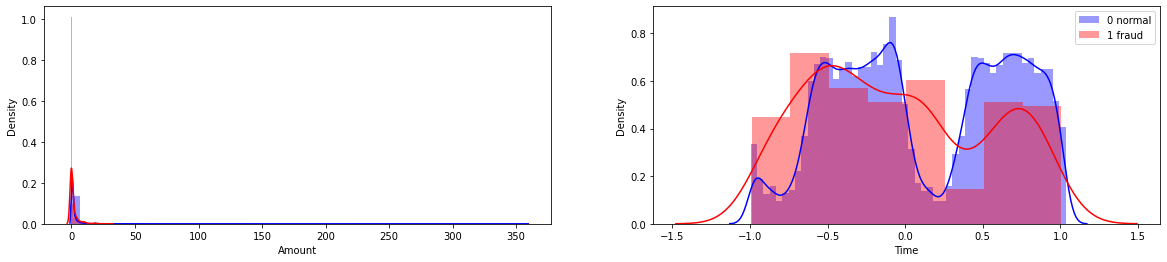

In [238]:
fig, axes = plt.subplots(figsize=(20, 4), ncols=2)

sns.distplot(df[df['Class']==0]['Amount'] , ax=axes[0], color='b', label='0 normal')
sns.distplot(df[df['Class']==1]['Amount'] , ax=axes[0],  color='r', label='1 fraud')

sns.distplot(df[df['Class']==0]['Time'] , ax=axes[1], color='b', label='0 normal')
sns.distplot(df[df['Class']==1]['Time'] , ax=axes[1],  color='r', label='1 fraud')

plt.legend()
plt.show()


### 전처리 : 정규화 / 아웃라이어

In [16]:
df = df.sample(frac=1)  #shuffle

fdf  = df[df['Class']==1]
ndf  = df[df['Class']==0][:len(fdf)]
under_df = pd.concat([fdf, ndf])
print(fdf.shape, ndf.shape, under_df.shape)

# Shuffle dataframe rows
under_df = under_df.sample(frac=1, random_state=42)
under_df.head()


(492, 31) (492, 31) (984, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
159594,112697.0,-0.701727,-0.127902,-2.017077,-0.864529,2.100013,-1.662211,1.796474,-0.959714,-0.025845,...,0.438374,1.773073,-0.246917,-0.369291,-1.149163,0.031246,-0.476683,0.515579,74.00,0
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
211711,138531.0,0.790751,0.982492,-0.901394,1.663026,0.456009,-0.851266,0.605451,-0.217941,0.046863,...,-0.107461,0.021013,-0.052317,-0.264887,-0.329493,0.086225,0.077273,-0.005748,20.00,0
142405,84694.0,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,-3.214055,...,1.269205,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,12.31,1
42635,41181.0,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,-6.557760,...,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,11.38,1


In [17]:
df = df.sample(frac=1)  #shuffle
ndf  = df[df['Class']==0]
fdf  = df[df['Class']==1][:len(ndf)]
over_df = pd.concat([fdf, ndf])
print(fdf.shape, ndf.shape, over_df.shape)

# Shuffle dataframe rows
over_df = over_df.sample(frac=1, random_state=42)
over_df.head()

(492, 31) (284315, 31) (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
146886,87941.0,-1.050956,-0.942441,1.216667,-3.411780,0.655516,1.632842,-0.718565,0.691244,-2.194543,...,-0.066064,0.168578,-0.202853,-0.980076,0.550153,-0.037756,0.293708,0.100681,39.00,0
246669,153274.0,1.941947,-0.480494,-0.205475,0.510268,-0.818011,-0.505709,-0.607858,-0.067676,1.188133,...,0.184574,0.745816,0.148848,0.059567,-0.287164,0.567915,-0.016301,-0.042849,28.75,0
199565,133023.0,1.734399,-0.471311,-0.385393,1.671643,-0.531747,-0.260849,-0.129117,-0.025537,1.195705,...,-0.461019,-1.253027,0.360474,-0.098448,-0.377065,-1.111984,0.038003,-0.013967,106.39,0
77524,57089.0,-0.691193,0.204071,0.912173,0.464954,1.639731,0.444840,0.512685,-0.122235,-0.035544,...,-0.021310,0.358574,-0.395696,-1.332618,-0.239885,-0.281936,0.005688,-0.240982,19.40,0
199189,132848.0,1.915840,-0.609569,-0.169995,0.420142,-0.936966,-0.273025,-0.838071,0.171534,1.175393,...,0.215224,0.744450,0.177674,0.044648,-0.380121,0.552109,-0.028514,-0.057895,16.35,0


### 상관분석

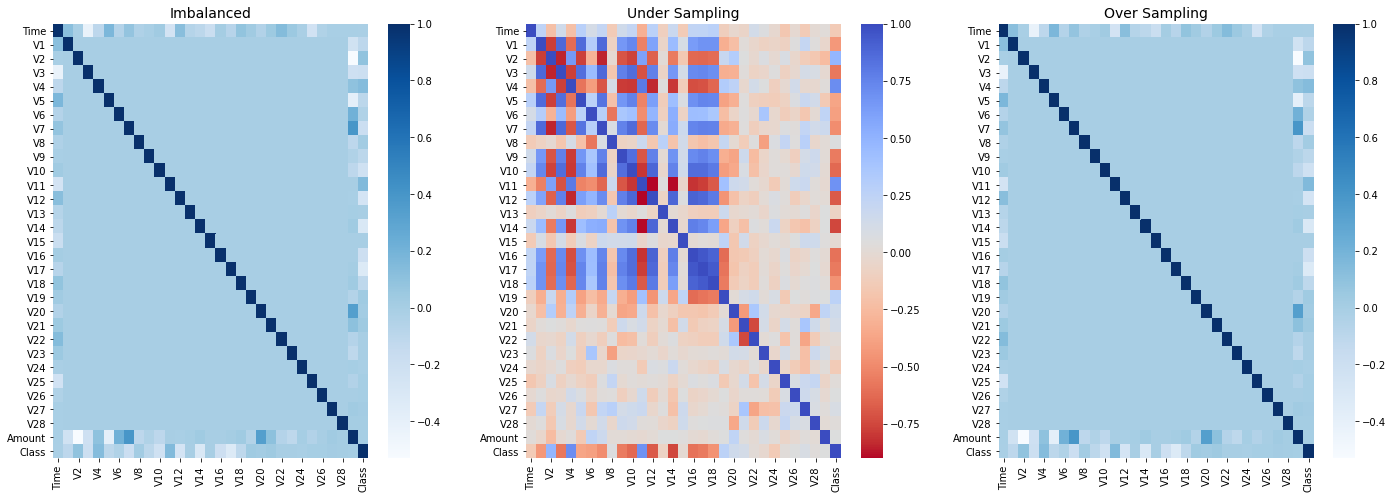

In [18]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,8))

sns.heatmap(df.corr(), cmap='Blues', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced", fontsize=14)


sns.heatmap(under_df.corr(), cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Under Sampling', fontsize=14)

sns.heatmap(over_df.corr(), cmap='Blues', annot_kws={'size':20}, ax=ax3)
ax3.set_title('Over Sampling', fontsize=14)
plt.show()

under_Class 피쳐와 (+) 상관관계 TOP-n Index(['Class', 'V4', 'V11', 'V2', 'V19'], dtype='object')
under_Class 피쳐와 (-) 상관관계 TOP-n Index(['V14', 'V12', 'V10', 'V16', 'V9'], dtype='object')


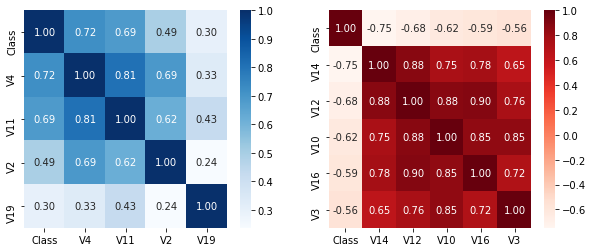

In [243]:
#### target(SalePrice)에 영향을 주는 상위 n개 피쳐에 대해서만 상관 분석
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

under_top_corr_large  = under_df.corr().nlargest(5, 'Class').index
print("under_Class 피쳐와 (+) 상관관계 TOP-n", under_top_corr_large)
sns.heatmap(under_df[under_top_corr_large].corr(), annot=True, cmap='Blues', fmt='0.2f' , ax=ax1)

under_top_corr_small = under_df.corr().nsmallest(5, 'Class').index
print("under_Class 피쳐와 (-) 상관관계 TOP-n", under_top_corr_small)
sns.heatmap(under_df[['Class','V14', 'V12', 'V10', 'V16', 'V3']].corr(), annot=True, cmap='Reds', fmt='0.2f' , ax=ax2)
plt.show()


over_Class 피쳐와 (+) 상관관계 TOP-n Index(['Class', 'V11', 'V4', 'V2', 'V21'], dtype='object')
over_Class 피쳐와 (-) 상관관계 TOP-n ['V14', 'V12', 'V10', 'V16', 'V3']


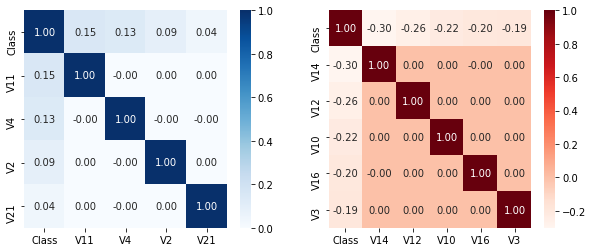

In [244]:
#### target(SalePrice)에 영향을 주는 상위 n개 피쳐에 대해서만 상관 분석
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

over_top_corr_large  = over_df.corr().nlargest(5, 'Class').index
print("over_Class 피쳐와 (+) 상관관계 TOP-n", over_top_corr_large)
sns.heatmap(over_df[over_top_corr_large].corr(), annot=True, cmap='Blues', fmt='0.2f' , ax=ax1)

over_top_corr_small = over_df.corr().nsmallest(5, 'Class').index
print("over_Class 피쳐와 (-) 상관관계 TOP-n", top_corr_small)
sns.heatmap(over_df[['Class','V14', 'V12', 'V10', 'V16', 'V3']].corr(), annot=True, cmap='Reds', fmt='0.2f' , ax=ax2)
plt.show()


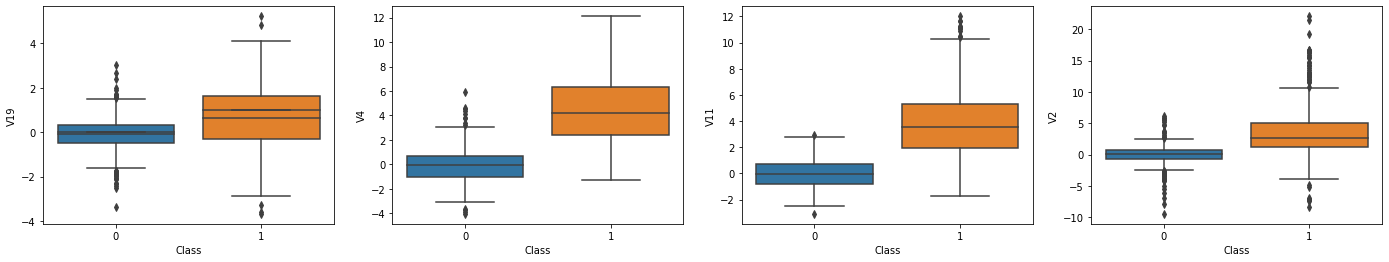

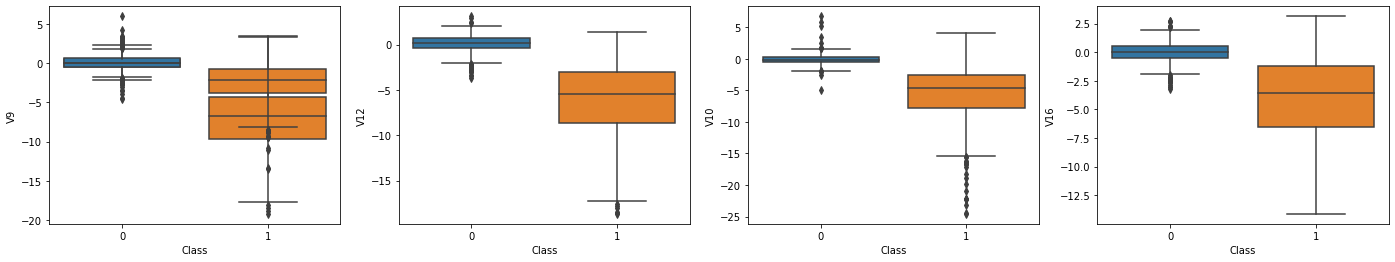

In [245]:
### 아웃라리어 확인
#============== (+)
fig, axs = plt.subplots(figsize=(24,4), ncols=4)
for i, feature in enumerate(under_top_corr_large):
    row = int(i / 5) 
    col = i % 4
    # seaborn의 regplot 이용하여 박스플롯
    sns.boxplot(x='Class', y=feature, data=under_df, ax=axs[col])

#============== (-) top_corr_small
fig, axs = plt.subplots(figsize=(24,4), ncols=4)
for i, feature in enumerate(under_top_corr_small):
    row = int(i / 5) 
    col = i % 4
    # seaborn의 regplot 이용하여 박스플롯
    sns.boxplot(x='Class', y=feature, data=under_df, ax=axs[col])

    

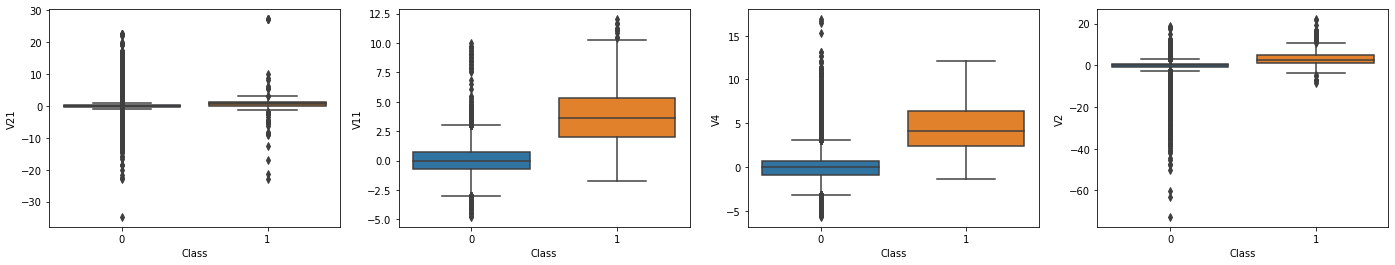

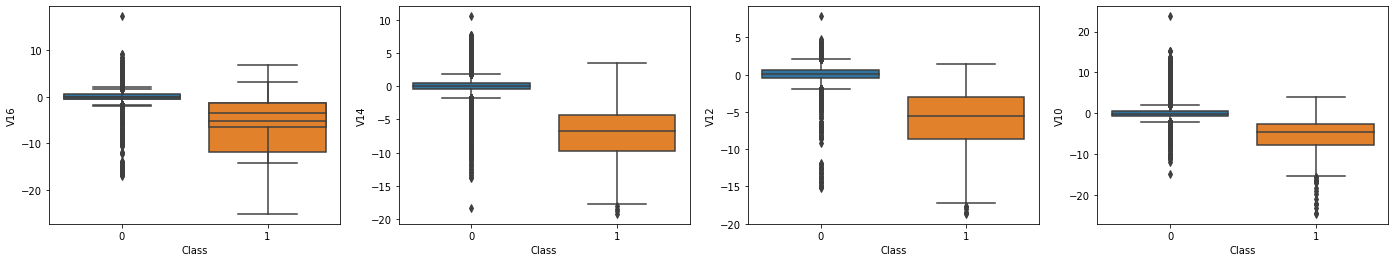

In [246]:
### 아웃라리어 확인
#============== (+)
fig, axs = plt.subplots(figsize=(24,4), ncols=4)
for i, feature in enumerate(over_top_corr_large):
    row = int(i / 5) 
    col = i % 4
    # seaborn의 regplot 이용하여 박스플롯
    sns.boxplot(x='Class', y=feature, data=over_df, ax=axs[col])

#============== (-) top_corr_small
fig, axs = plt.subplots(figsize=(24,4), ncols=4)
for i, feature in enumerate(over_top_corr_small):
    row = int(i / 5) 
    col = i % 4
    # seaborn의 regplot 이용하여 박스플롯
    sns.boxplot(x='Class', y=feature, data=over_df, ax=axs[col])

    

## 아웃라이어 삭제

In [247]:
from collections import Counter
def detect_outliers(df, n, features):
    outlier_idx_list = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        IQR15 = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - IQR15) | (df[col] > Q3 + IQR15)].index
        outlier_idx_list.extend(outlier_list_col)
    outlier_idx_list = Counter(outlier_idx_list)
    multiple_outliers = list(k for k, v in outlier_idx_list.items() if v > n)
    return multiple_outliers

#fdf = df[df['Class']==1][col]

# under_top_feature = ['V4', 'V11', 'V2', 'V19', 'V14', 'V12', 'V10', 'V16']
# under_outlier_drop_row = detect_outliers(under_df, 2, under_top_feature)
# print(under_outlier_drop_row)

# print("under_Outlier 처리전:", under_df.shape)
# under_df = under_df.drop(under_outlier_drop_row, axis = 0).reset_index(drop=True)
# print("under_Outlier 처리후:", under_df.shape)


# over_top_feature = ['V11', 'V4', 'V2', 'V21','V14', 'V12', 'V10', 'V16']
# over_outlier_drop_row = detect_outliers(over_df, 2, over_top_feature)
# print(over_outlier_drop_row)

# print("over_Outlier 처리전:", over_df.shape)
# over_df = over_df.drop(over_outlier_drop_row, axis = 0).reset_index(drop=True)
# print("over_Outlier 처리후:", over_df.shape)

[12261, 12070, 11841, 154684, 154587, 151519, 10801, 152295, 11710, 11343, 154371, 153823, 152223, 12108, 11880, 12369, 10897, 9509, 9252, 10568, 10630, 8296, 8335, 150601, 9035, 9179, 9487, 8615, 150697, 44223, 150679, 150715, 150680, 150925, 151011, 43428, 43681, 43204, 43061, 42936, 42756, 42700, 150667, 150663, 150668, 150669, 42887, 42945, 150666, 42784, 42674, 42635, 150660, 42528, 150662, 150684, 42696, 42590, 42958, 150661, 41943, 150644, 150678, 150692, 150677, 150687]
under_Outlier 처리전: (984, 31)
under_Outlier 처리후: (918, 31)
[150684, 43841, 137961, 6427, 6529, 43773, 169751, 6870, 247995, 4895, 7057, 203700, 150662, 35210, 18649, 174293, 151462, 143336, 38433, 131229, 15539, 282846, 173054, 135776, 19145, 5820, 15204, 30384, 153885, 13953, 11343, 167184, 12229, 14590, 173653, 147008, 243547, 156988, 17916, 154454, 12325, 73857, 48955, 181544, 172296, 150715, 74496, 13499, 191359, 274771, 270867, 151011, 14115, 8335, 172787, 144108, 150661, 10783, 94580, 151008, 4054, 9253, 12

# Under Sampling / Over Sampling 학습 /평가

In [205]:
under_X = under_df.drop('Class', axis=1)
under_y = under_df['Class']

under_X_train,under_X_test,under_y_train,under_y_test = train_test_split(under_X, under_y, test_size=0.2, random_state=160)
rf = RandomForestClassifier()
rf.fit(under_X_train, under_y_train)
under_pred = rf.predict(under_X_test)
under_proba = rf.predict_proba(under_X_test)
print("under_전처리 전 우선 점수부터 확인------\n")
myscore(under_y_test, under_pred, under_proba)

전처리 전 우선 점수부터 확인------

정확도:0.9348,재현율:0.8846,정밀도:0.9583,f1:0.9200,auc:0.9784
confusion: [[103   3]
 [  9  69]]


In [249]:
over_X = over_df.drop('Class', axis=1)
over_y = over_df['Class']

over_X_train,over_X_test,over_y_train,over_y_test = train_test_split(over_X, over_y, test_size=0.2, random_state=160)
rf = RandomForestClassifier()
rf.fit(over_X_train, over_y_train)
over_pred = rf.predict(over_X_test)
over_proba = rf.predict_proba(over_X_test)
print("over_전처리 전 우선 점수부터 확인------\n")
myscore(over_y_test, over_pred, over_proba)

over_전처리 전 우선 점수부터 확인------

정확도:0.9998,재현율:0.0000,정밀도:0.0000,f1:0.0000,auc:0.7631
confusion: [[55909     0]
 [   13     0]]


## feature_importance_

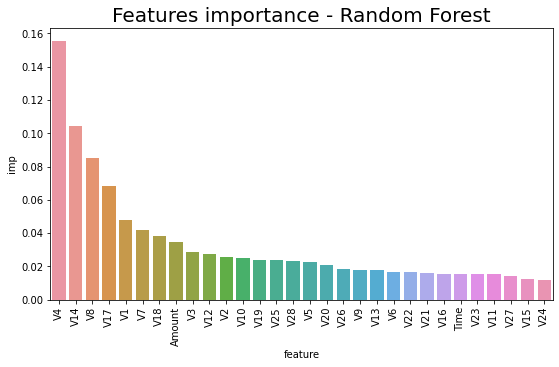

In [257]:
plt.figure(figsize = (9,5))

imp_df = pd.DataFrame({'feature': over_X.columns, 'imp': rf.feature_importances_})
imp_df = imp_df.sort_values(by='imp',ascending=False)
print(imp_df)


g = sns.barplot(x='feature',y='imp',data=imp_df)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show() 

In [218]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
rf.fit(under_X_train, under_y_train)
under_pred = rf.predict(under_X_test)
under_proba = rf.predict_proba(under_X_test)
print("under_전처리 전 우선 점수부터 확인------\n")
myscore(under_y_test, under_pred, under_proba)

전처리 전 우선 점수부터 확인------

정확도:0.9130,재현율:0.8667,정밀도:0.9512,f1:0.9070,auc:0.9804
confusion: [[90  4]
 [12 78]]


In [250]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
rf.fit(over_X_train, over_y_train)
over_pred = rf.predict(over_X_test)
over_proba = rf.predict_proba(over_X_test)
print("over_전처리 전 우선 점수부터 확인------\n")
myscore(over_y_test, over_pred, over_proba)

over_전처리 전 우선 점수부터 확인------

정확도:0.9998,재현율:0.0000,정밀도:0.0000,f1:0.0000,auc:0.7251
confusion: [[55909     0]
 [   13     0]]


### 정밀도_재현율 커브 곡선 ( 임계치 확인용 )

50 50 49


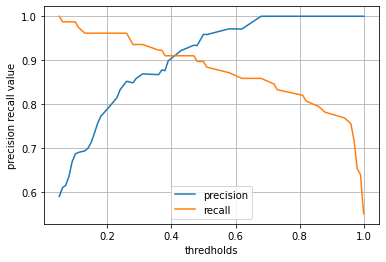

In [208]:
pscore,rscore,th = precision_recall_curve(under_y_test, under_proba[:,-1])
print(len(pscore), len(rscore), len(th)) #58 58 57

plt.plot(th, pscore[:len(th)], label="precision")
plt.plot(th, rscore[:len(th)], label="recall")
plt.xlabel("thredholds")
plt.ylabel("precision recall value")
plt.legend()
plt.grid()
plt.show()

17 17 16


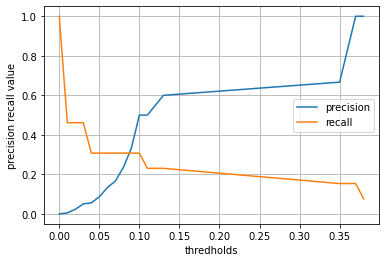

In [251]:
pscore,rscore,th = precision_recall_curve(over_y_test, over_proba[:,-1])
print(len(pscore), len(rscore), len(th)) #58 58 57

plt.plot(th, pscore[:len(th)], label="precision")
plt.plot(th, rscore[:len(th)], label="recall")
plt.xlabel("thredholds")
plt.ylabel("precision recall value")
plt.legend()
plt.grid()
plt.show()

In [209]:
thresholds = [0.3,0.35,0.4,0.45,0.5]
for th in thresholds:
    binarizer = Binarizer(threshold=th)
    under_pred = binarizer.fit_transform(under_proba[:,-1].reshape(-1,1))
    
    print("Negative:Positive",th,1-th)  #, pred[:10], proba[:10])#P.s
    myscore(under_y_test, under_pred, under_proba)  # 0.45최상-------------------

Negative:Positive 0.3 0.7
정확도:0.9130,재현율:0.9359,정밀도:0.8690,f1:0.9012,auc:0.9784
confusion: [[95 11]
 [ 5 73]]
Negative:Positive 0.35 0.65
정확도:0.9076,재현율:0.9231,정밀도:0.8675,f1:0.8944,auc:0.9784
confusion: [[95 11]
 [ 6 72]]
Negative:Positive 0.4 0.6
정확도:0.9239,재현율:0.9103,정밀도:0.9103,f1:0.9103,auc:0.9784
confusion: [[99  7]
 [ 7 71]]
Negative:Positive 0.45 0.55
정확도:0.9348,재현율:0.9103,정밀도:0.9342,f1:0.9221,auc:0.9784
confusion: [[101   5]
 [  7  71]]
Negative:Positive 0.5 0.5
정확도:0.9348,재현율:0.8846,정밀도:0.9583,f1:0.9200,auc:0.9784
confusion: [[103   3]
 [  9  69]]


<pre>
* Threadhold : 0.45
    정확도:0.9348,재현율:0.9103,정밀도:0.9342,f1:0.9221,auc:0.9784
   confusion: [[101   5]
               [  7  71]]
</pre>

In [252]:
thresholds = [0.3,0.35,0.4,0.45,0.5]
for th in thresholds:
    binarizer = Binarizer(threshold=th)
    over_pred = binarizer.fit_transform(over_proba[:,-1].reshape(-1,1))
    
    print("Negative:Positive",th,1-th)  #, pred[:10], proba[:10])#P.s
    myscore(over_y_test, over_pred, over_proba)  # 0.45최상-------------------

Negative:Positive 0.3 0.7
정확도:0.9998,재현율:0.1538,정밀도:0.6667,f1:0.2500,auc:0.7251
confusion: [[55908     1]
 [   11     2]]
Negative:Positive 0.35 0.65
정확도:0.9998,재현율:0.1538,정밀도:1.0000,f1:0.2667,auc:0.7251
confusion: [[55909     0]
 [   11     2]]
Negative:Positive 0.4 0.6
정확도:0.9998,재현율:0.0000,정밀도:0.0000,f1:0.0000,auc:0.7251
confusion: [[55909     0]
 [   13     0]]
Negative:Positive 0.45 0.55
정확도:0.9998,재현율:0.0000,정밀도:0.0000,f1:0.0000,auc:0.7251
confusion: [[55909     0]
 [   13     0]]
Negative:Positive 0.5 0.5
정확도:0.9998,재현율:0.0000,정밀도:0.0000,f1:0.0000,auc:0.7251
confusion: [[55909     0]
 [   13     0]]


### ROC 커브곡선

roc0.9784


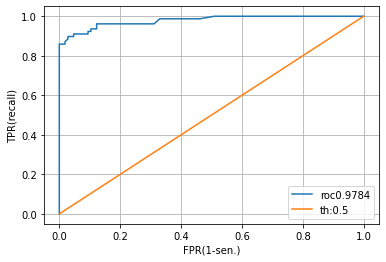

In [213]:
auc = roc_auc_score(under_y_test, under_proba[:,-1].reshape(-1,1))
print("roc{:.4f}".format(auc))
fpr,tpr,th = roc_curve(under_y_test, under_proba[:,-1]) #th: max(score_len) + 1
plt.plot(fpr, tpr, label="roc{:.4f}".format(auc))
plt.plot([0,1], [0,1], label="th:0.5")
plt.xlabel("FPR(1-sen.)")
plt.ylabel("TPR(recall)")
plt.legend()
plt.grid()
plt.show()

roc0.7251


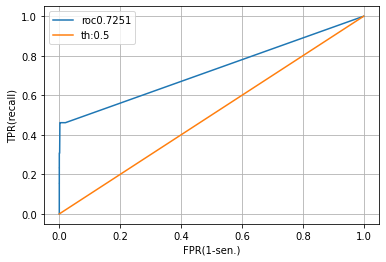

In [253]:
auc = roc_auc_score(over_y_test, over_proba[:,-1].reshape(-1,1))
print("roc{:.4f}".format(auc))
fpr,tpr,th = roc_curve(over_y_test, over_proba[:,-1]) #th: max(score_len) + 1
plt.plot(fpr, tpr, label="roc{:.4f}".format(auc))
plt.plot([0,1], [0,1], label="th:0.5")
plt.xlabel("FPR(1-sen.)")
plt.ylabel("TPR(recall)")
plt.legend()
plt.grid()
plt.show()

## 오버샘플링 -----------SMOTE  / NearMiss
* pip install imblearn
* X_train, y_train

In [19]:
from imblearn.over_sampling import SMOTE, NearMiss

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=160)

smote = SMOTE(random_state=0)
over_X_train,over_y_train = smote.fit_sample(X_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', over_X_train.shape, over_y_train.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(over_y_train).value_counts())


ImportError: cannot import name 'NearMiss'

In [256]:
lgb = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
rf.fit(over_X_train, over_y_train)
over_pred = rf.predict(over_X_test)
over_proba = rf.predict_proba(over_X_test)
print("over_전처리 전 우선 점수부터 확인------\n")
myscore(over_y_test, over_pred, over_proba)

over_전처리 전 우선 점수부터 확인------

정확도:0.9997,재현율:0.0000,정밀도:0.0000,f1:0.0000,auc:0.7829
confusion: [[55904     5]
 [   13     0]]


normal data distribution: Counter({0: 492, 1: 426})
SMOTE data distribution: Counter({0: 492, 1: 492})
[[90  4]
 [11 79]]


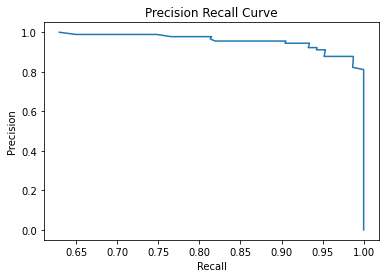

In [214]:
# from imblearn.pipeline import make_pipeline as make_pipeline_imb
# from imblearn.over_sampling import SMOTE
# from imblearn.metrics import classification_report_imbalanced
# from collections import Counter
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)
# # build model with SMOTE imblearn
# classifier = RandomForestClassifier
# smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), classifier(random_state=42))
# smote_model = smote_pipeline.fit(X_train, y_train)
# smote_prediction = smote_model.predict(X_test)

# #Showing the diference before and after the transformation used
# print("normal data distribution: {}".format(Counter(y)))
# X_smote, y_smote = SMOTE().fit_sample(X, y)
# print("SMOTE data distribution: {}".format(Counter(y_smote)))
# print(confusion_matrix(y_test, smote_prediction))

# y_pred_prob = smote_pipeline.predict_proba(X_test)[:,1]

# # Generate precision recall curve values: precision, recall, thresholds
# precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# # Plot ROC curve
# plt.plot(precision, recall)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision Recall Curve')
# plt.show()


In [177]:
# #### 튜닝
# #params of the model
# hyper_param = {"max_depth": [3,5],
#               "n_estimators":[3,5,10]} 
#              # "max_features": [5,6,7,8]}

# # Creating the classifier
# model = RandomForestClassifier(verbose=0 )  #max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, 
# grid_search = GridSearchCV(model, param_grid=hyper_param, cv=5, scoring='recall', refit=True)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_score_)
# print(grid_search.best_params_)

0.7135976129582268
{'max_depth': 5, 'n_estimators': 10}


In [182]:
# param_grid = {'C': [0.01, 0.1, 1, 10],'penalty':['l1', 'l2']}

# logreg = LogisticRegression(random_state=2)
# grid_search_lr = GridSearchCV(logreg, param_grid=param_grid, scoring='recall', cv=5)
# grid_search_lr.fit(X_train, y_train)
# print(grid_search_lr.best_score_)
# print(grid_search_lr.best_params_)

0.6142369991474851
{'C': 1, 'penalty': 'l2'}


In [186]:
# logreg = LogisticRegression(C=1, penalty='l2',random_state=2)
# logreg.fit(X_train, y_train)         
# # Printing the Training Score
# print("Cross Validation of X and y Train: ")
# print(cross_val_score(logreg,X_train, y_train, cv=5, scoring='recall'))
# y_pred = logreg.predict(X_test)

# print(confusion_matrix(y_test, y_pred))
# print(recall_score(y_test , y_pred))
# print(f1_score(y_test,y_pred))

Cross Validation of X and y Train: 
[0.55072464 0.60869565 0.67647059 0.64705882 0.58823529]
[[85281    14]
 [   48    98]]
0.6712328767123288
0.7596899224806201
